In [2]:
import cv2, matplotlib, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rect_util as ru


[(41, 576, 127, 639), (128, 593, 223, 631), (281, 593, 383, 639), (384, 592, 511, 639), (512, 618, 639, 639), (640, 618, 744, 639), (1062, 593, 1103, 606), (1177, 576, 1238, 639), (0, 640, 127, 703), (256, 640, 383, 700), (384, 640, 511, 700), (512, 640, 639, 700), (640, 640, 767, 700), (1152, 640, 1278, 703), (0, 704, 127, 767), (256, 708, 383, 761), (384, 708, 511, 761), (512, 708, 639, 761), (640, 708, 767, 761), (1152, 704, 1238, 761), (0, 768, 127, 831), (128, 792, 223, 823), (0, 832, 1, 863)]


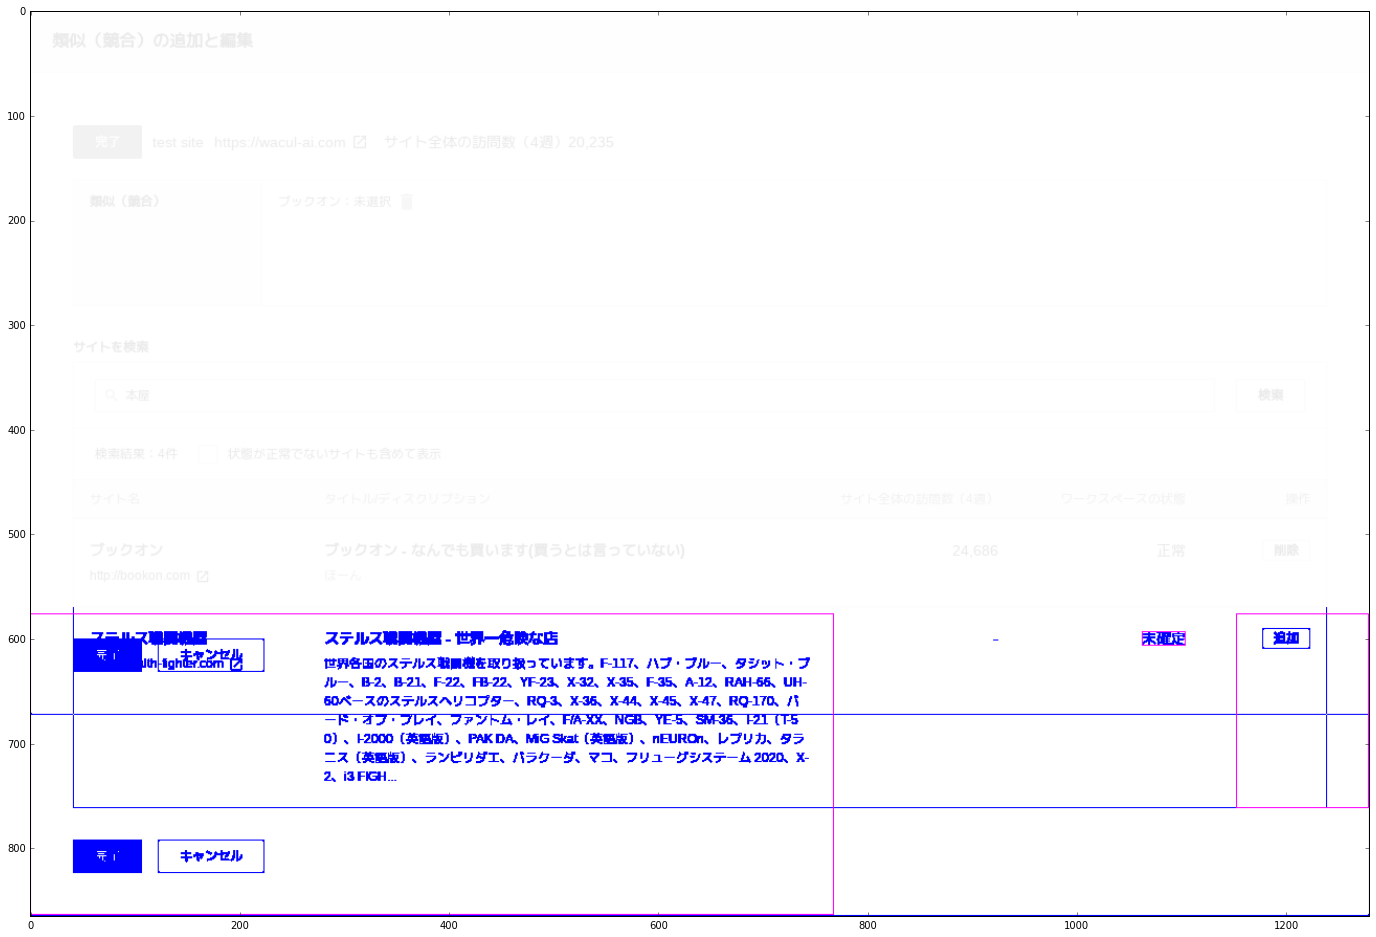

In [3]:
%matplotlib inline

input = cv2.imread('img/diff/ut/cmp/should render similar site without invalid sites.png')
in2 = cv2.cvtColor(input, cv2.COLOR_RGB2GRAY)
_, t = cv2.threshold(in2, 130, 255, cv2.THRESH_BINARY)

result = ru.nonzero_rects(t, 128, 64)
print(result)

plt.figure(figsize=(24, 18))
plt.imshow(ru.render_rects(input, ru.marge_rects(result, 40), (255, 0, 255)))

[(42, 101, 1237, 163), (57, 178, 99, 189), (105, 178, 169, 189), (41, 220, 1238, 329), (42, 353, 1237, 458), (561, 478, 719, 521), (41, 541, 1238, 613), (1200, 652, 1278, 653), (0, 645, 299, 689), (0, 705, 1, 715)]
[(0, 0, 1279, 177), (0, 162, 104, 219), (98, 162, 1279, 219), (0, 188, 1279, 352), (0, 328, 1279, 477), (0, 457, 1279, 540), (0, 520, 1279, 644), (298, 612, 1279, 716), (0, 612, 1199, 704), (0, 688, 1279, 716)]


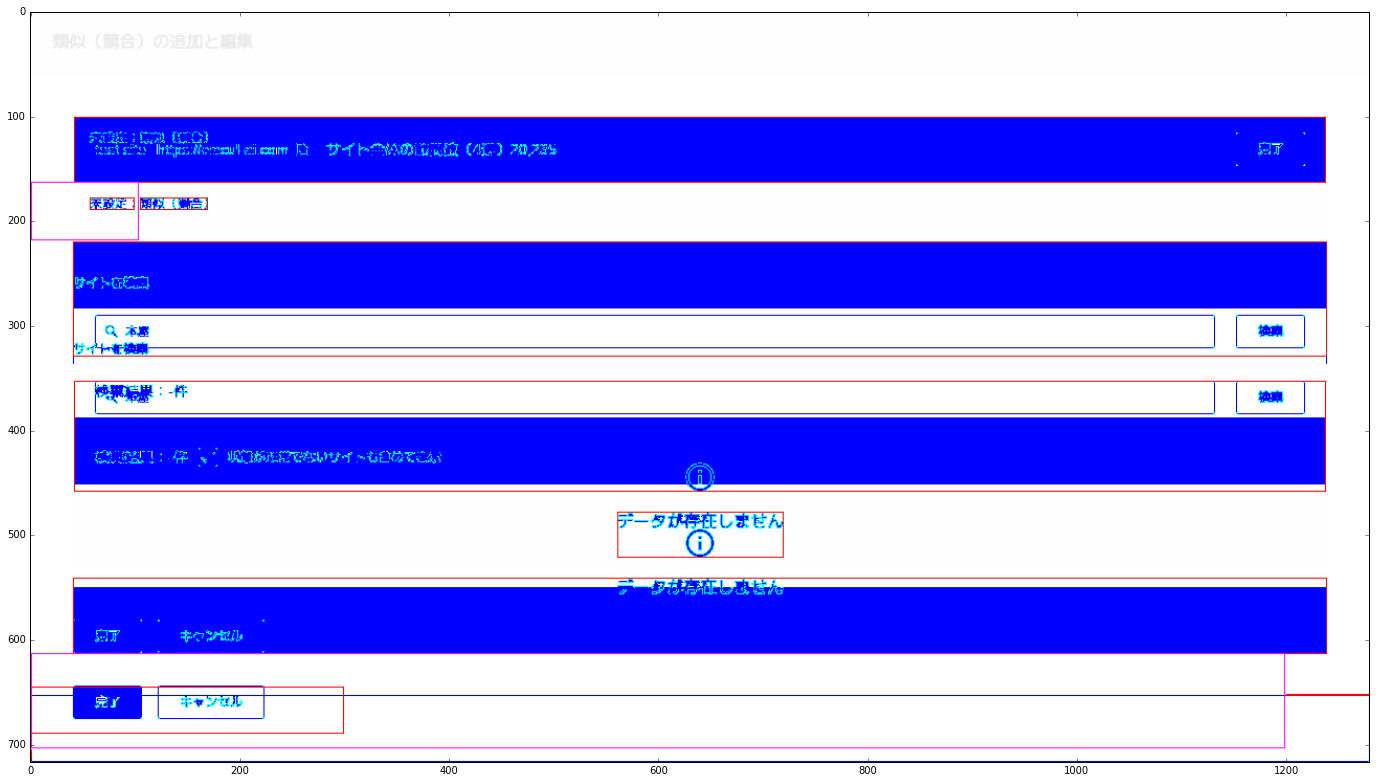

In [4]:
%matplotlib inline

input = cv2.imread('img/diff/ut/cmp/should debounce to fetch similar sites.png')
in2 = cv2.cvtColor(input, cv2.COLOR_RGB2GRAY)
    
_, t = cv2.threshold(in2, 200, 200, cv2.THRESH_BINARY)
rects = ru.marge_rects(ru.nonzero_rects(t, 100, 15), 2)
print(rects)

results =  [ru.expand(rects, i, in2.shape) for i in range(len(rects))]
print(results)

ru.render_rects(input, rects, (255, 0, 0))
ru.render_rects(input, [results[1], results[8]], (255, 0, 255), 1, -1)
plt.figure(figsize=(24, 18))
plt.imshow(input)